# Introduction to Neural Networks 


** Ecole Centrale Nantes **

** Diana Mateus **


** Participants : **



## General description
In this lab we will create a simple classifier based on neural networks. We will progress in two parts:
- In the first part, and to better understand the involved operations, we will create a single-neuron model and optimize its parameters "by hand". For this first part we will only use the **Numpy** library
- We will then build a multi-layer perceptron with the built-in library **Keras** module and **tensorflow**. Tensorflow is already installed in the university computers. If using your own computer you should have already installed **tensorflow** or use **collab** online platform.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split
import pandas as pd

### Loading the dataset
Start by runing the following lines to load and visualize the data.

In [2]:
def load_dataset():
    train_dataset = h5py.File('dataset/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:]) 
    train_y = np.array(train_dataset["train_set_y"][:])
    test_dataset = h5py.File('dataset/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:]) 
    test_y = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes

#### Visualize data

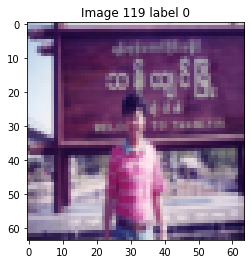

Train X shape: (209, 64, 64, 3)
We have 209 images of dimensionality 64x64x3


In [3]:
train_x, train_y, test_x, test_y, classes=load_dataset()
# run several times to visualize different data points
# the title shows the ground truth class labels (0=no cat , 1 = cat)
index = np.random.randint(low=0,high=train_y.shape[1])
plt.imshow(train_x[index])
plt.title("Image "+str(index)+" label "+str(train_y[0,index]))
plt.show()
print ("Train X shape: " + str(train_x.shape))
print ("We have "+str(train_x.shape[0]), 
       "images of dimensionality " 
       + str(train_x.shape[1])+ "x"
       + str(train_x.shape[2])+ "x"
       + str(train_x.shape[3]))



#### Preprocessing
In the following lines we vectorize the images (Instead of a 2-D image we will give as input to the models a 1-D vector). The normalization makes the image intensities be between 0 and 1, and converts the images to floats.

In [4]:
train_x = train_x.reshape(train_x.shape[0], -1).T
test_x = test_x.reshape(test_x.shape[0], -1).T
print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))
print ("Test X shape: " + str(test_x.shape))
print ("Test Y shape: " + str(test_y.shape))

Train X shape: (12288, 209)
Train Y shape: (1, 209)
Test X shape: (12288, 50)
Test Y shape: (1, 50)


In [5]:
train_x = train_x/255.
test_x = test_x/255.


### 1. Classification with a single neuron 


**a)** Fill-in the following three functions to define the single neuron model:
- A function **initialize_parameters** that randomly initializes the model's weights with small values. The number of the weights corresponds to the dimension of the input (size of the image)
- A function **sigmoid** that computes the sigmoid activation function
- A function **neuron** that given an input vector, weights and biases computes the output of the single neuron model

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
def initialize_parameters(dim):
    #w = np.around(np.random.uniform(-1,1, size=dim),2)
    #b = np.around(np.random.uniform(0,1, size=1),2)
    w = np.random.randn(dim, 1)*0.01
    b = 0
    return w, b

In [8]:
def neuron(w,b,X):
    A = sigmoid(np.dot(w.T, X)+b)  
    return A

**b)** **Forward Pass:**
Use the three functions above to compute a first forward pass for the input matrix $X$ containing the loaded dataset, for some initialization of the weights and bias.
 
 \begin{align}
 Y_{\rm pred}=\sigma(w^\top X+b) = [y_{\rm pred}^{(1)},y_{\rm pred}^{(2)},\dots,y_{\rm pred}^{(m)}]
 \end{align}
 

In [9]:
w,b = initialize_parameters(train_x.shape[0])

PR = (neuron (w, b, train_x))
print(w,b)
print (PR.shape)

[[ 0.00368554]
 [ 0.01283037]
 [ 0.00539749]
 ...
 [ 0.00017089]
 [-0.01306266]
 [-0.00858931]] 0
(1, 209)


**c) Cost estimation:**
 
We will use a binary cross-entropy loss, so that the empirical risk can be computed as:
 \begin{align}
 E = - \frac{1}{m} \sum_{i=1}^m 
 y^{(i)} \log(y_{\rm pred}^{(i)}) +
 (1-y^{(i)}) \log(1-y_{\rm pred}^{(i)})
 \end{align}
 
 The following cross-entropy function should give as result the scalar cost value computed over the entire dataset

In [10]:
def crossentropy(Y,pred,X):
    m = X.shape[1]
    cost = (-1/m) * np.sum(Y*np.log(pred)+(1-Y) * np.log(1-pred))  
    cost = np.squeeze(cost)
    return cost

**d) Back propagation:**

After initializing the parameters and doing a forward pass, we need to backpropagate the cost by computing the gradient with respect to the model parameters to later update the weights

\begin{align}
\frac{\partial E}{\partial w} = & \frac{1}{m} X(Y_{\rm pred}-Y)^T\\
\frac{\partial E}{\partial b} = & \frac{1}{m} (Y_{\rm pred}-Y)\\
\end{align}

See a demonstration of how the gradient was computed in 
https://en.wikipedia.org/wiki/Cross_entropy

Fill-in the backpropagation function which receives as input the the training set (X,Y), as well as the current predictions and returns the gradients updates for the weights and bias

Hint: When the error is computed for several samples simultaneously, the gradient is averaged over the contribution of different samples.

In [11]:
def backpropagate(X, Y, pred):
    m = X.shape[1]
    
    #find gradient (back propagation)
    dw = (1/m) * np.dot(X, (pred-Y).T)
    db = (1/m) * np.sum(pred-Y)
    grads = {"dw": dw,
             "db": db} 
    
    return grads
backpropagate(train_x,train_y,PR)

{'dw': array([[0.0931257 ],
        [0.10993609],
        [0.09199149],
        ...,
        [0.08654535],
        [0.09936124],
        [0.06401346]]),
 'db': 0.25675260155819724}

**e) Optimization**
After initializing the parameters, computing the cost function, and calculating gradients, we can now update the parameters using gradient descent. Use the functions implemented above to fill_in the "gradient_descent" function that optimizes the parameters given a training set X, Y, a fixed number of iterations, and a learning_rate. Store and plot the value of the loss function at each iteration

In [12]:
def gradient_descent(X, Y, iterations, learning_rate):
    costs = []
    w, b = initialize_parameters(X.shape[0])
    
    for i in range(iterations):
        pred = (neuron (w, b, X))
        cost = crossentropy(Y,pred,X)
        grads= backpropagate(X,Y,pred)
        
        #update parameters
        w = w - learning_rate * grads["dw"]
        b = b - learning_rate * grads["db"]
        costs.append(cost)
        
        if i % 500 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w":w,
              "b":b}   
    return costs, params

costs, params = gradient_descent(train_x,train_y, 2000, 0.005)

Cost after iteration 0: 0.656514
Cost after iteration 500: 0.304244
Cost after iteration 1000: 0.215509
Cost after iteration 1500: 0.166938


**e) Plot the training curve**
Plot the evolution of the cost vs the iterations 

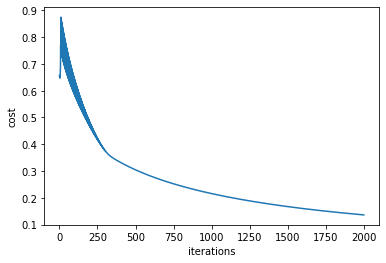

In [13]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

**f) Prediction**
Use the optimized parameters to make predictions both for the train and test sets and compute the accuracy for each. What do you observe?

In [14]:
def predict(w, b, X):    
    m = X.shape[1]
    y_pred = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    N = neuron (w, b, X)
    
    for i in range(N.shape[1]):
        y_pred[0,i] = 1 if N[0,i] >0.5 else 0 
        pass
    return y_pred
   
# predict 
w = params["w"]
b = params["b"]
train_pred_y = predict(w, b, train_x)
test_pred_y = predict(w, b, test_x)
print("Train Acc: {} %".format(100 - np.mean(np.abs(train_pred_y - train_y)) * 100))
print("Test Acc: {} %".format(100 - np.mean(np.abs(test_pred_y - test_y)) * 100))
    

Train Acc: 99.04306220095694 %
Test Acc: 70.0 %


**g) Early stopping** 
- Adapt the gradient descent function to consider part (a percentage) of the training data for validation. Use the validation set to choose the training hyperparameters (learning_rate, iterations). 
- Plot the training and validation curves
- Report again the training and test accuracy and loss for the new trained model
- What do you observe



In [17]:
X_train, X_val, Y_train, Y_val = train_test_split(train_x,train_y, test_size=0.2,random_state=0)
    

ValueError: Found input variables with inconsistent numbers of samples: [12288, 1]

### 2. CNNs with Keras

Adapt the example in this website https://keras.io/examples/vision/mnist_convnet/ to our problem. To this end:
-# change the number of classes and the input size
-# remove the expand_dims(x_train, -1): it is not necessary to expand the dimensions since our input is 3-dimensional 
- you may need to transpose the labels vector
-# change the categorical cross-entropy to the binary cross entropy given that our problem is binary classification. 
-# also change the softmax to sigmoid, the more appropriate activation function for binary data

We can choose a single neuron output passed through sigmoid, and then set a threshold to choose the class, or use two neuron output and then perform a softmax.

**2.1** Can you get the accuracy better than in our hand single-neuron model?Try different configurations and explain the changes you have made.

**2.2** Compute the train and test loss and accuracy after the model has been trained.  What model parameters does the ``fit`` function retain?

**2.3** How many parameters does the network have, explain where the number comes from.

**2.4** What is the receptive field of the network https://distill.pub/2019/computing-receptive-fields/

In [20]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
# the data, split between train and test sets
x_train2, y_train2, x_test2, y_test2, classes=load_dataset()

# Scale images to the [0, 1] range
x_train2 = x_train2.astype("float32") / 255
x_test2 = x_test2/ 255

# convert class vectors to binary class matrices
y_train2= y_train2.reshape(y_train2.shape[0], -1).T
y_test2= y_test2.reshape(y_test2.shape[0], -1).T

# Kera model
# Model / data parameters
num_classes = 1
input_shape = (64, 64, 3)

# Print  
print("x_train shape:", x_train2.shape)
print(x_train2.shape[0], "train samples")
print(x_test2.shape[0], "test samples")
print (x_train2.shape)
print (x_test2.shape)
print (y_train2.shape)
print (y_test2.shape)
print ( classes)


x_train shape: (209, 64, 64, 3)
209 train samples
50 test samples
(209, 64, 64, 3)
(50, 64, 64, 3)
(209, 1)
(50, 1)
[b'non-cat' b'cat']


In [74]:
#build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ])

model.summary() 
model.layers   
hidden1 = model.layers[6]
w,b = hidden1.get_weights()

print(w, w.shape)


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 12544)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)               

In [77]:
#compile and fit
batch_size = 40
epochs = 12

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

hist = model.fit(x_train2, y_train2, batch_size=batch_size, epochs=epochs, validation_data=(x_test2,y_test2))


Epoch 1/12
6/6 [==============================] - 0s 39ms/step - loss: 0.0260 - accuracy: 1.0000 - val_loss: 0.7136 - val_accuracy: 0.8400
Epoch 2/12
6/6 [==============================] - 0s 29ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.6638 - val_accuracy: 0.8800
Epoch 3/12
6/6 [==============================] - 0s 29ms/step - loss: 0.0173 - accuracy: 0.9952 - val_loss: 0.6805 - val_accuracy: 0.8800
Epoch 4/12
6/6 [==============================] - 0s 27ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.7104 - val_accuracy: 0.8600
Epoch 5/12
6/6 [==============================] - 0s 28ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.6975 - val_accuracy: 0.8400
Epoch 6/12
6/6 [==============================] - 0s 29ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.7399 - val_accuracy: 0.9000
Epoch 7/12
6/6 [==============================] - 0s 29ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.7625 - val_accuracy: 0.8800
Epoch 8/12
6/6 [===========

Train loss: 0.10636474937200546
Train accuracy: 0.9665071964263916
Val loss: 0.4022897779941559
Val accuracy: 0.8399999737739563


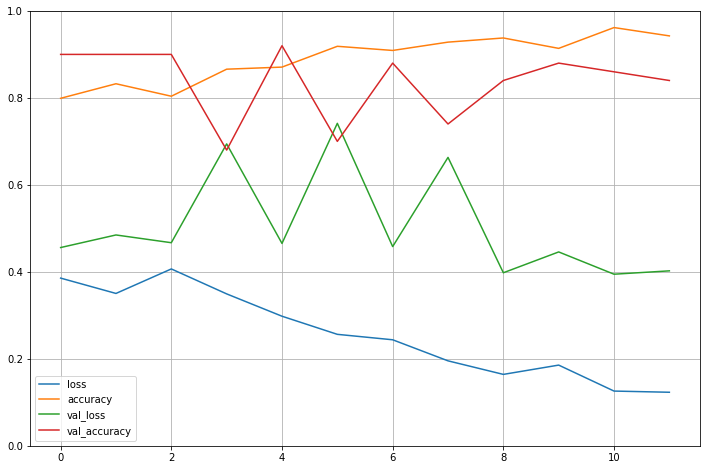

In [68]:
#evaluate
def aff_history():
    loss_curve = hist.history ["loss"]
    acc_curve = hist.history ["accuracy"]
    plt.plot (loss_curve)
    plt.title ("loss")
    plt.show()
    plt.plot (acc_curve)
    plt.title ("Accuracy")
    plt.show()



score_train = model.evaluate(x_train2, y_train2, verbose=0)
print("Train loss:", score_train[0])
print("Train accuracy:", score_train[1])

score_eval = model.evaluate(x_test2, y_test2, verbose=0)
print("Val loss:", score_eval[0])
print("Val accuracy:", score_eval[1])

pd.DataFrame(hist.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## BONUS: 
Replace the fit function by your own tensorflow  implementation

1. Instantiate one of keras.optimizers to train the model.

optimizer = 

2. Instantiate a loss from keras.losses

loss_fn = 

3. Prepare the metrics. Instatiate the metrics from keras.metrics

train_acc_metric =
val_acc_metric =

4. Stochastic Gradient Loop
    * Iterate over the dataset in batches with 
    * Open a GradientTape() scope 
    * Inside this scope call the model (forward pass)
    * Compute the loss outside the scope
    * Retrieve the weight gradients
    * Use the optimimzer to update the weights with the gradients

